In [2]:
library(tidyverse)

# 1. 표본추출
-  표본추출(sampling)이란, 통계분석시 확보된 전체 데이터(모집단)의 어떤 정보를 얻기 위해서 혹은 사실을 확인하기 위해 데이터의 일부를 추출하는 것을 의미합니다. 
-   표본추출의 종류에는 확률표본추출과 비확률표본추출이 있으나, ADP에서 다루는 데이터에는 확률표본추출이 적합하므로 확률표본추출만 다루겠습니다. 
-  대표적인 확률표본추출의 방법은 다음과 같습니다.

## 불균형 데이터 처리
- 탐색하는 타깃 데이터의 수가 매우 극소수인 경우에 불균형 데이터 처리를 한다.
- 불균형 데이터 처리 기법으로는 언더 샘플링, 오버 샘플링, 임곗값 이동 (Cut-Off Value Moving)
- 앙상블 기법이 있다.

- **불균형 데이터에서 정확도가 높아도 재현율이 급격히 낮아지는 현상 발생**

![계통추출.jpg](https://imghub.insilicogen.com/media/photos/%EC%96%B8%EB%8D%94%EC%83%98%ED%94%8C%EB%A7%81%EA%B3%BC_%EC%98%A4%EB%B2%84%EC%83%98%ED%94%8C%EB%A7%81_P3B5KVU.png)

- 클래스 불균형을 해결하는 한 가지 방법은 관찰 데이터가 적은 쪽의 데이터에 더 큰 가중치Weight를 주거나, 데이터가 적은 쪽을 잘못 분류했을 때 더 많은 비용(Cost 또는 Loss)을 부과하는 것이다.[16] 보통 모델링 함수의 param, loss, cost 등의 파라미터에 이런 값들을 지정할 수 있다.

## 가. 언더 샢를링 (과소표집) 
- 다수 클래스의 데이터를 일부만 선택하여 데이터의 비율을 맞추는 방법
- 과소 표집의 경우 데이터의 소실이 매우 크고, 때로는 중요한 정상 데이터를 잃을 수 있다.

### 01. 단순임의추출법(Simple Random Sampling)
단순 무작위 추출법(simple random sampling)은 통계학에서 사용하는, 모집단(population)의 각각의 요소 또는 사례들이 표본(sample)으로 선택될 가능성이 같게 되는 표본 추출법이다. 유한모집단에서 n개의 추출단위로 구성된 모든 부분집합들이 표본으로 선택될 확률이 같도록 설계된 표본추출방법을 뜻한다. 


In [ ]:
index_1 <- sample(1:nrow(ames), round(nrow(ames) * 0.7))
train_1 <- ames[index_1, ]
test_1  <- ames[-index_1, ]

In [ ]:
library(caret)

index_2 <- createDataPartition(ames$Sale_Price, p = 0.7, 
                               list = FALSE)
train_2 <- ames[index_2, ]
test_2  <- ames[-index_2, ]

In [ ]:
library(rsample)

split_1  <- initial_split(ames, prop = 0.7)
train_3  <- training(split_1)
test_3   <- testing(split_1)

### 02. 계통표본추출법(Systematic Sampling)
계통표집은 체계적 표집, 체계적 추출법(systematic sampling)이라고도 하며, 첫 번째 요소는 무작위로 선정한 후 목록의 매번 k번째 요소를 표본으로 선정하는 표집방법이다. 모집단의 크기를 원하는 표본의 크기로 나누어 k를 계산한다. (출처: 위키백과)

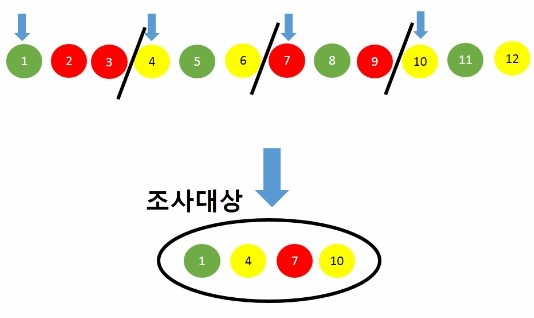

In [15]:
library(doBy)
sample_sys <- sampleBy(formula = ~Species, frac = 0.3, # frac: 추출할 샘플의 비율
                        data = iris, replace = FALSE, systematic = TRUE)

### 03. 층화표본추출법(Stratified Sampling)
통계학에서, 층화표집(層化標集, Stratified sampling)은 모집단을 먼저 중복되지 않도록 층으로 나눈 다음 각 층에서 표본을 추출하는 방법이다. 층을 나눌 때 층내는 동질적(homogeneous), 층간은 이질적(heterogeneous) 특성을 가지도록 하면 적은 비용으로 더 정확한 추정을 할 수 있으며, 전체 모집단뿐만 아니라 각 층의 특성에 대한 추정도 할 수 있다는 장점이 있다. 

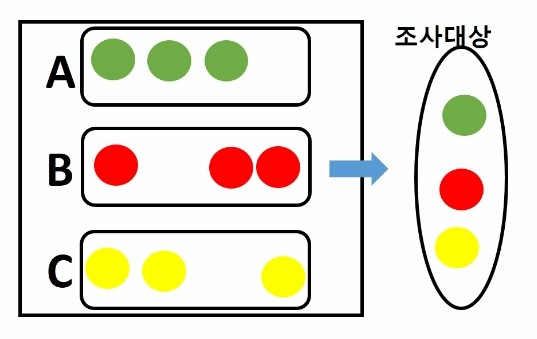

In [5]:
split_strat <- rsample::initial_split(iris, prop = 0.7,
                                      strata = "Species")
train_strat <- rsample::training(split_strat)
train_strat <- rsample::training(split_strat)

### 04. ENN (Edited Neareest Neighbor)
- ENN은 소수 클래스 주위에 인접한 다수 클래스 데이터를 제거하여 데이터의 비율을 맞누츤 방법

In [228]:
data <- read.csv("C:/Users/이찬솔/Documents/diabetes.csv")
data %>% dim
data %>% glimpse
data$Outcome %>% table

[1] 768   9

Rows: 768
Columns: 9
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, ~
$ Glucose                  <int> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125~
$ BloodPressure            <int> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74~
$ SkinThickness            <int> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, ~
$ Insulin                  <int> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, ~
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.~
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2~
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 3~
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ~


.
  0   1 
500 268 

In [229]:
ENN <- ubENN(data %>% select(-c("Outcome")), data$Outcome, verbose = TRUE)

Number of instances removed from majority class with ENN: 19 	 Time needed: 0.26 


In [232]:
ENN$Y %>% table

.
  0   1 
481 268 

### 05. 토멕 링크 방법 (Tomek Link Method)
- 토멕 링크는 클래스를 구분하는 경계선 가까이에 존재하는 데이터이다.
- 토멕 링크 방법은 다수 클래스에 속한 토멕 링크를 제거하는 방법

In [201]:
library(unbalanced)

In [220]:
Tomek <- ubTomek(data %>% select(-c("Outcome")), data$Outcome, verbose = TRUE)

Instances removed 105 : 21 % of 0 class ; 13.67 % of training ; Time needed 0 


In [227]:
# 0 class의 105개를 제거하여 다운샘플링함
Tomek$Y %>% table

.
  0   1 
395 268 

### 06. CNN (Condensed Nearest Neighbor) 
- CNN은 다수 클래스에 밀집된 데이터가 없을 떄 까지 데이터를 제거하여 데이터 분포에서 대표적인 데이터만 남도록 하는 방법

In [234]:
library(unbalanced)
CNN <- ubCNN(data %>% select(-c("Outcome")), data$Outcome, verbose = TRUE)

In [235]:
CNN$Y %>% table

.
  0   1 
492 268 

### 07. OSS (One Sided Selection)
- OSS는 토멕 링크 방법과 CNN기법의 장점을 혼합
- OSS는 다수 클래스의 데이터를 토멕 링크 방법으로 제거한 후 CNN을 이용하여 밀집된 데이터를 제거

In [236]:
library(unbalanced)
OSS <- ubOSS(data %>% select(-c("Outcome")), data$Outcome, verbose = TRUE)

Instances removed 105 : 21.04 % of 0 class ; 13.69 % of training ; Time needed 0.01 


In [237]:
OSS$Y %>% table

.
  0   1 
394 268 

## 나. 오버 샘플링 (과대표집)
- 과대 표집은 소수 클래스의 데이터를 복제 또는 생성하여 데이터의 비율을 맞추는 방법
- 정보가 손실되지 않는다는 장점이 잇으나, 과적합을 초래할 수 있음
- 알고리즘의 성능은 높으나(언더샘플링에 비해 높음) 검증의 성능은 나빠질 수 있다.
- 데이터 증가로 인한 계산시간의 증가

### 01. 랜덤 과대 표집 (ROS)
- 랜덤 과대 표집은 무작위로 소수 클래스 데이터를 복제하여 데이터의 비율을 맞춤
- **중복된 표본으로 인하여 과적함 문제 가능성 높음**

In [242]:
UpSamp <- caret::upSample(data, data$Outcome %>% factor)
# Urban이 오버샘플링된 Class 변수 추가

In [246]:
UpSamp %>% dim
UpSamp$Class %>% table

[1] 1000   10

.
  0   1 
500 500 

### 02. SMOTE (Synthetic Minority Oversampling Technique)
- 소수 클래스에서 중심이 되는 데이터와 주변 데이터 사이에 가상의 직선을 만든 후, 그 위에 데이터를 추가


- SMOTE는 먼저 분류 개수가 적은 쪽의 데이터의 샘플을 취한 뒤 
- 이 샘플의 k 최근접 이웃k nearest neighbor을 찾는다. 
- 그리고 현재 샘플과 이들 k개 이웃 간의 차difference를 구하고, 이 차이에 0 ~ 1 사이의 임의의 값을 곱하여 원래 샘플에 더한다. 
- 이렇게 만든 새로운 샘플을 훈련 데이터에 추가한다. 결과적으로 SMOTE는 기존의 샘플을 주변의 이웃을 고려해 약간씩 이동시킨 점들을 추가하는 방식으로 동작한다.


- 생성된 데이터를 무조건 소수 클래스라고 하지 않고, 분류 모형에 따라 분류

![계통추출.jpg](https://imghub.insilicogen.com/media/photos/SMOTE_OPUxJ6w.png)
![계통추출.jpg](https://imghub.insilicogen.com/media/photos/smote_detail.png)

In [80]:
library(DMwR)

In [ ]:
DMwR::SMOTE(
  form,  # 모델 포뮬러
  data,  # 포뮬러를 적용할 데이터
  perc.over = 200,  # 적은 쪽의 데이터를 얼마나 추가로 샘플링해야 하는지
  k = 5,            # 고려할 최근접 이웃의 수
  # 적은 쪽의 데이터를 추가로 샘플링할 때 각 샘플에 대응해서 많은 쪽의 데이터를 얼마나 샘플링할지 지정
  perc.under = 200
)

In [251]:
data$Outcome <- data$Outcome %>% as.factor
Smote <- DMwR::SMOTE(Outcome ~ ., data,
                     perc.over = 100, perc.under = 200)

In [253]:
Smote %>% dim
Smote$Outcome %>% table

[1] 1072    9

.
  0   1 
536 536 

- perc.over는 개수가 적은 분류로부터 얼마나 많은 데이터를 생성해낼지over sampling를 조정하는 변수며, 
- perc.under는 개수가 많은 분류의 데이터를 얼마나 적게 샘플링할지under sampling를 조정하는 변수다. 이들 파라미터는 시행착오를 통해 지정해도 되고, 다음에 설명하는 방법을 참고해서 정해도 된다.

- perc.over는 보통 100 이상으로 정하는 값으로 적은 쪽의 데이터 한 개당 perc.over/100개의 추가 데이터가 생성되어 샘플링된다. 
- perc.under는 많은 쪽의 데이터 중 얼마만큼의 비율을 샘플링할 것인지를 정하는데 이 비율은 perc.over에 의해 추가로 생성된 데이터와 비례해서 정해진다. 
- 예를 들어, perc.over에 의해 200개의 추가 데이터가 적은 쪽 분류에 추가로 생성되었고, perc.over가 100이라면 많은 쪽 분류에 속하는 데이터로부터도 200개의 데이터가 취해진다.

In [254]:
library(smotefamily)
Smote <- smotefamily::SMOTE(data %>% select(-c("Outcome")), data$Outcome, 
                             dup_size = 1)

In [262]:
Smote$data %>% dim
Smote$data$class %>% table
# Urban이 오버샘플링된 Class 변수 추가

[1] 1036    9

.
  0   1 
500 536 

### ADASYN (ADAptive SYNthetic Sampling Approach)
- 모든 소수 클래스에서 다수 클래스의 관측비율을 계산하여 SMOTE를 적용
- 주위 데이터의 분포에 따라 오버 샘플링 할 데이터를 좀 더 체계적으로 조절

In [263]:
ADASYN <- smotefamily::ADAS(data %>% select(-c("Outcome")), data$Outcome, K  = 5)

In [266]:
ADASYN$data %>% dim
ADASYN$data$class %>% table
# Urban이 오버샘플링된 Class 변수 추가

[1] 974   9

.
  0   1 
500 474 

## 다. 임곗값 이동 
- 임곗값을 조정

## 라. 앙상블 기법
- 같거나 서로 다른 여러 가지 모형들의 예측/분류 결과를 종합하여 최종적인 의사 결정에 활용
- 과소 표집, 과대 표집, 임곗값 이동을 조합한 앙상블 생성 가능
- 앙상블의 예측 중에서 가장 많은 표를 받은 클래스를 최종적으로 선택

## 교차 검정 샘플링

In [268]:
library(cvTools)

- n개 데이터를 K개로 분할하여 R회 교차 검정 데이터 생성

In [278]:
cross <- cvFolds(nrow(data), K = 3, R = 1, type = "random") # "consecutive", "interleaved"

- 1 fold의 검정 데이터

In [295]:
R = 1
data[cross$subsets[cross$which == 1, R], ] %>% dim

[1] 256   9

- 1 fold 훈련 데이터

In [296]:
data[-cross$subsets[cross$which == 1, R], ] %>% dim

[1] 512   9